### 데이터 불러오기

In [1]:
import pandas as pd

wet_22 = pd.read_csv("data/[기상_102]_날짜_요일_기상조건_2022.csv")
sub_22 = pd.read_csv("data/[지하철_100]호선별역별_승하차정보_2022.csv")

In [2]:
wet_22.head(1)

,연,월,일,요일,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2022,1,1,토,맑음,-4.3,-10.2,2.3,0.0


In [3]:
sub_22.head()

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,2022-01-01,2022,1,1,토,1호선,서울역,18398.0,16926.0
1,2022-01-01,2022,1,1,토,1호선,동묘앞,7240.0,7366.0
2,2022-01-01,2022,1,1,토,1호선,시청,5604.0,5006.0
3,2022-01-01,2022,1,1,토,1호선,종각,9977.0,8864.0
4,2022-01-01,2022,1,1,토,1호선,종로3가,11017.0,9630.0


In [4]:
sub_22['호선명'].value_counts()

호선명
5호선         20440
2호선         18250
7호선         15605
6호선         13800
3호선         12285
4호선          9490
9호선          9125
8호선          6570
9호선2~3단계     4745
1호선          3650
Name: count, dtype: int64

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


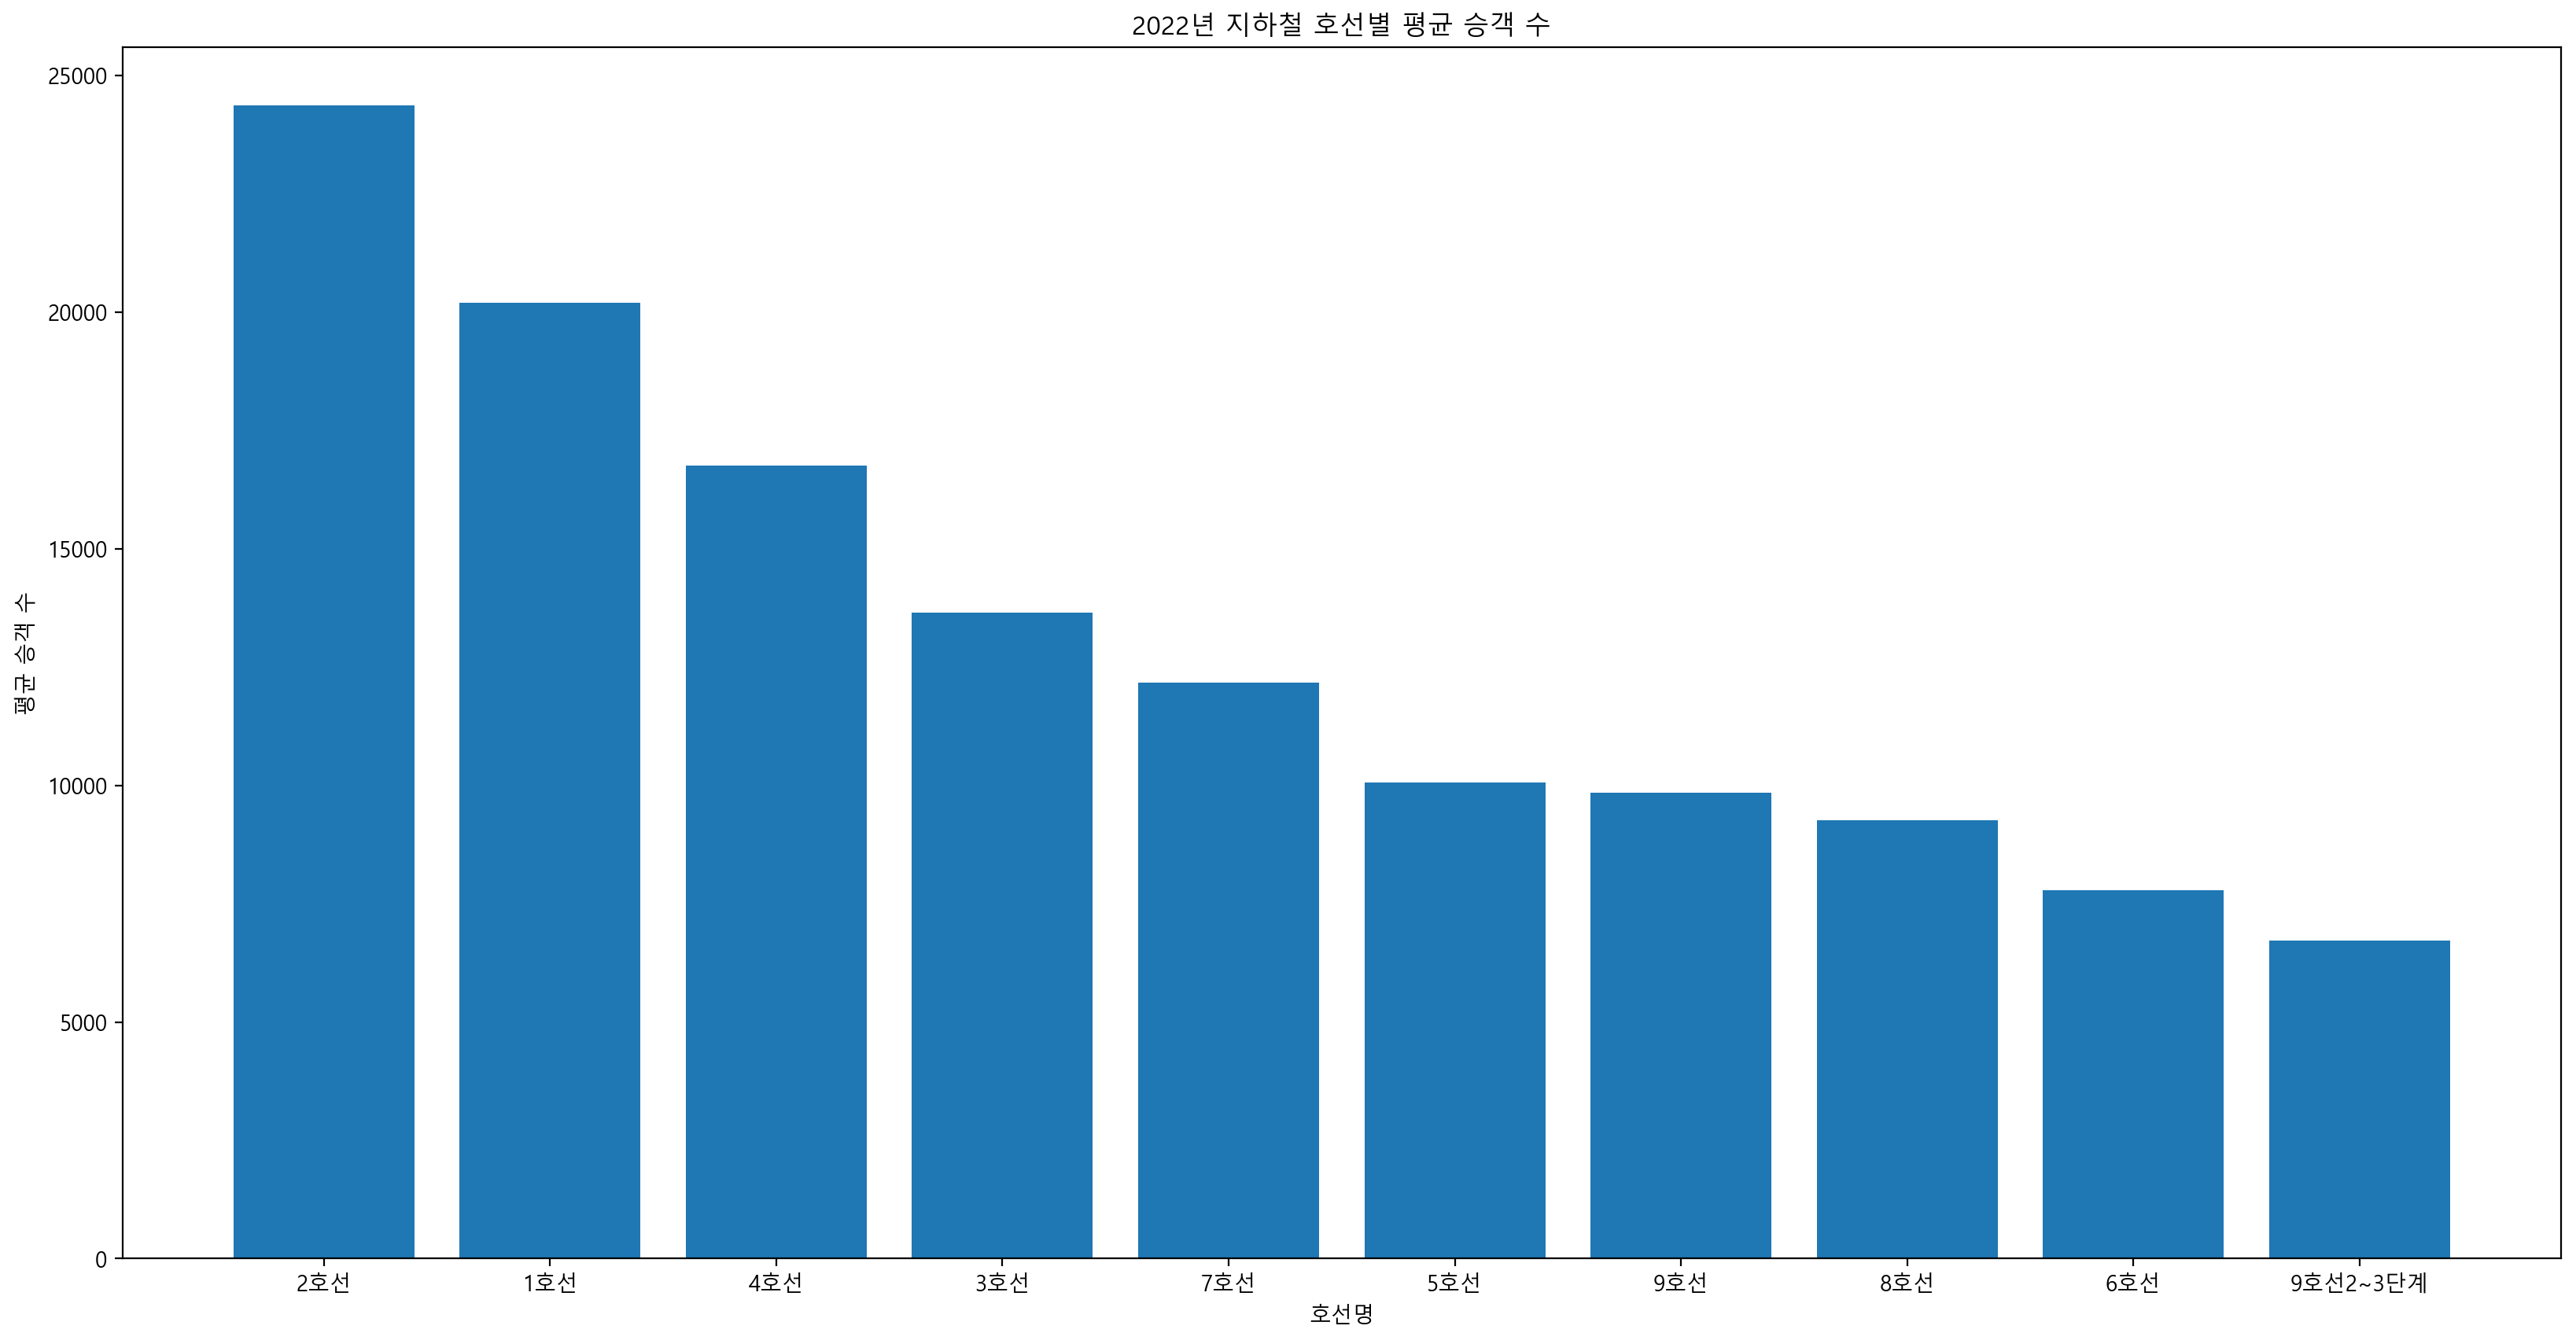

In [6]:
sub_all = sub_22.groupby(['호선명'])[['승차총승객수', '하차총승객수']].mean().reset_index()
sub_all['평균승객수'] = sub_all[['승차총승객수', '하차총승객수']].mean(axis=1)
sub_all = sub_all.sort_values(by='평균승객수', ascending=False)

plt.figure(figsize=(20, 10))
plt.bar(sub_all['호선명'], sub_all['평균승객수'])

plt.title('2022년 지하철 호선별 평균 승객 수')
plt.xlabel('호선명')
plt.ylabel('평균 승객 수')

plt.show()

## 4호선 성신여대입구역 컬럼 추출

In [7]:
line_4 = sub_22[sub_22['지하철역'] == '성신여대입구(돈암)'].reset_index()
line_4

,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0
1,412,2022-01-02,2022,1,2,일,4호선,성신여대입구(돈암),10387.0,10602.0
2,725,2022-01-03,2022,1,3,월,4호선,성신여대입구(돈암),17836.0,17395.0
3,1042,2022-01-04,2022,1,4,화,4호선,성신여대입구(돈암),18370.0,17764.0
4,1360,2022-01-05,2022,1,5,수,4호선,성신여대입구(돈암),18464.0,17978.0
...,...,...,...,...,...,...,...,...,...,...
360,112505,2022-12-27,2022,12,27,화,4호선,성신여대입구(돈암),20985.0,20400.0
361,112818,2022-12-28,2022,12,28,수,4호선,성신여대입구(돈암),21495.0,20672.0
362,113129,2022-12-29,2022,12,29,목,4호선,성신여대입구(돈암),21258.0,20412.0
363,113441,2022-12-30,2022,12,30,금,4호선,성신여대입구(돈암),22018.0,21161.0


### 기상조건 추가
- wet_22에서 기상조건 컬럼 추출

In [8]:
wet_22_con = wet_22['기상조건']
wet_22_con 

0        맑음
1      약한눈비
2        맑음
3        맑음
4        맑음
       ... 
360      맑음
361    약한눈비
362      맑음
363      맑음
364      맑음
Name: 기상조건, Length: 365, dtype: object

- 데이터프레임 합치기

In [9]:
ss_4 = pd.concat([line_4, wet_22_con], axis=1)
ss_4.drop(columns='index', axis=1)
ss_4.dropna(inplace=True)
ss_4

,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건
0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0,맑음
1,412,2022-01-02,2022,1,2,일,4호선,성신여대입구(돈암),10387.0,10602.0,약한눈비
2,725,2022-01-03,2022,1,3,월,4호선,성신여대입구(돈암),17836.0,17395.0,맑음
3,1042,2022-01-04,2022,1,4,화,4호선,성신여대입구(돈암),18370.0,17764.0,맑음
4,1360,2022-01-05,2022,1,5,수,4호선,성신여대입구(돈암),18464.0,17978.0,맑음
...,...,...,...,...,...,...,...,...,...,...,...
360,112505,2022-12-27,2022,12,27,화,4호선,성신여대입구(돈암),20985.0,20400.0,맑음
361,112818,2022-12-28,2022,12,28,수,4호선,성신여대입구(돈암),21495.0,20672.0,약한눈비
362,113129,2022-12-29,2022,12,29,목,4호선,성신여대입구(돈암),21258.0,20412.0,맑음
363,113441,2022-12-30,2022,12,30,금,4호선,성신여대입구(돈암),22018.0,21161.0,맑음


# EDA

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

- 한글 폰트 설정

In [11]:
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


## 4호선 성신여대입구(돈암)역 관련

### 기상조건별 4호선 성신여대입구역 승차총승객수

In [12]:
ss_4.groupby(['기상조건'])['승차총승객수'].mean()

기상조건
강한눈비     18447.000000
맑음       19205.534137
약한눈비     18229.865979
폭염/한파    18209.357143
Name: 승차총승객수, dtype: float64

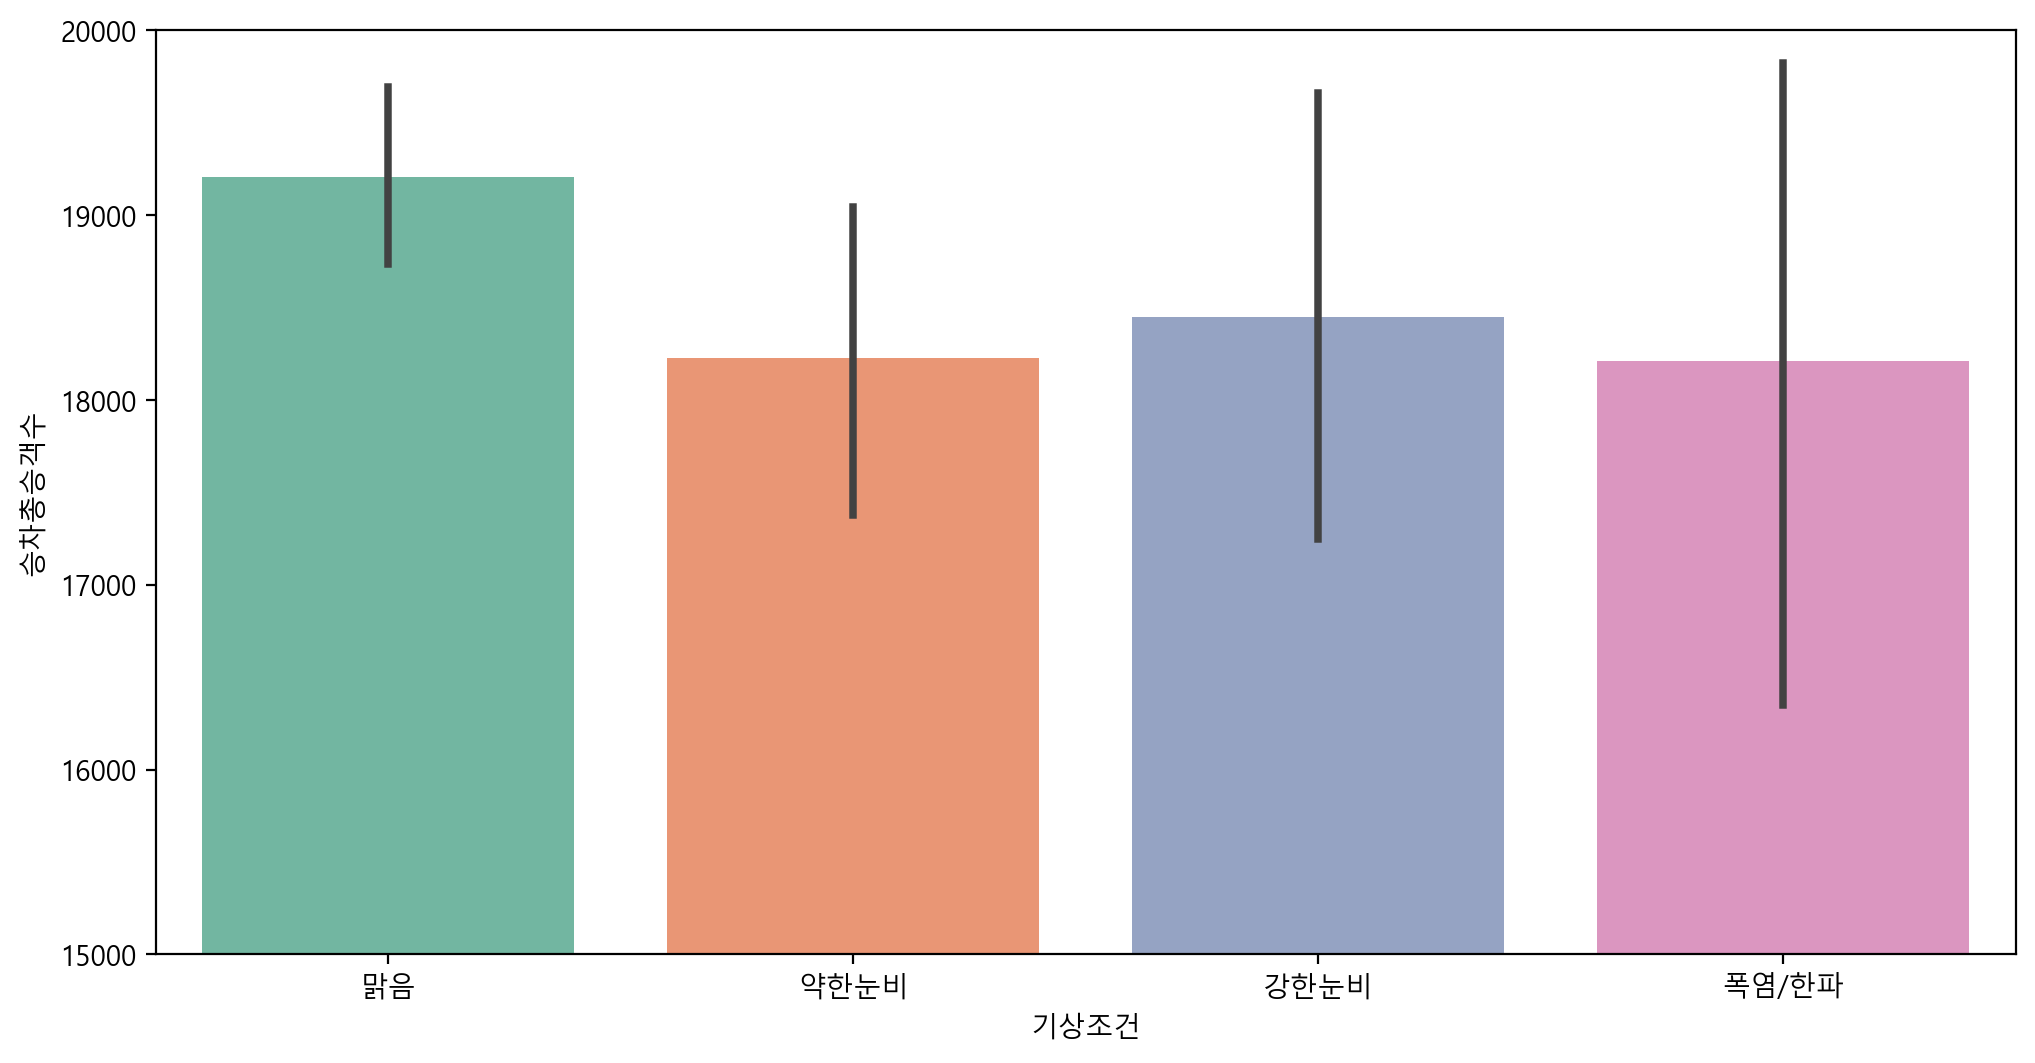

In [13]:
plt.figure(figsize = (12, 6))
sns.barplot(x = '기상조건',
            y = '승차총승객수',
            data = ss_4, 
            palette="Set2")
plt.ylim([15000, 20000])
plt.show()

### 월별 4호선 성신여대입구역 승차총승객수
- 계절별로 따져보면
  - 봄(3~5월): 승차총승객수 증가
  - 여름(6~8월): 승차총승객수 감소
  - 가을(9~11월): 승차총승객수 증가
  - 겨울(12~2월): 승차총승객수 감소
- 계절 날씨가 상대적으로 온화한 봄, 가을엔 지하철 타는 인원 증가, 계절 날씨가 불호인 여름과 겨울엔 감소하는걸까?

In [14]:
ss_4.groupby(['월'])['승차총승객수'].mean()

월
1     16581.806452
2     15640.178571
3     17072.612903
4     19069.000000
5     20511.354839
6     19224.633333
7     18323.193548
8     17611.354839
9     20338.600000
10    20571.064516
11    21251.033333
12    20400.161290
Name: 승차총승객수, dtype: float64

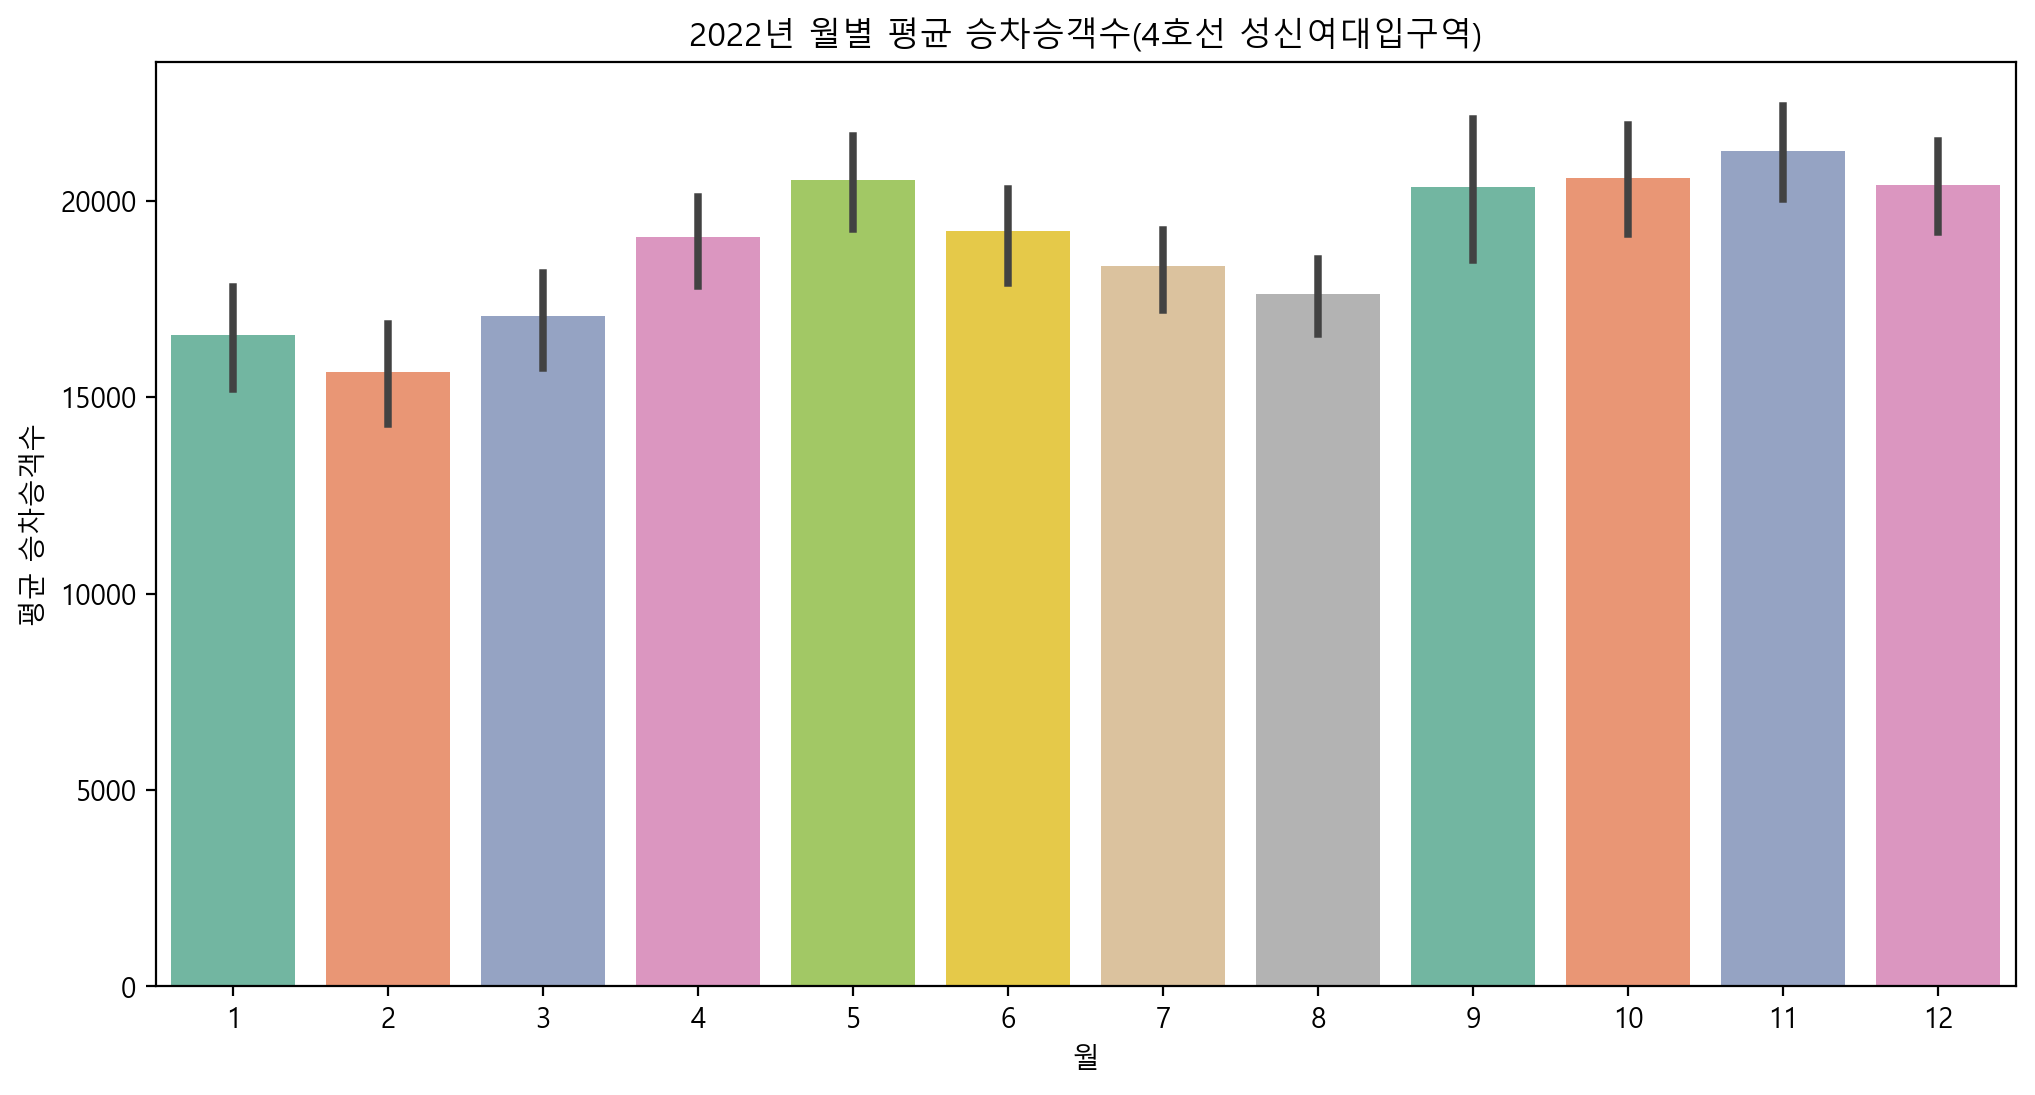

In [23]:
ss_4 = ss_4.astype({'월' : 'int'})
plt.figure(figsize = (12, 6))
sns.barplot(x = '월',
            y = '승차총승객수',
            data = ss_4, 
            palette="Set2")
plt.title('2022년 월별 평균 승차승객수(4호선 성신여대입구역)')
plt.xlabel('월')
plt.ylabel('평균 승차승객수')

plt.show()

### 승차총승객수가 가장 많은 11월달 한달간 4호선 승차인원 TOP
- 아 이건 월별자료 가지고 해야겠다.

In [24]:
line_4_nov = sub_22[(sub_22['호선명'] == '4호선') & (sub_22['월'] == 11) & (sub_22['요일'] == '금')].reset_index()
line_4_nov = line_4_nov.drop(columns=['index', '사용일자'], axis=1)
line_4_nov

,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,2022,11,4,금,4호선,당고개,9969.0,8810.0
1,2022,11,4,금,4호선,상계,20562.0,19327.0
2,2022,11,4,금,4호선,노원,20937.0,24458.0
3,2022,11,4,금,4호선,창동,28004.0,29922.0
4,2022,11,4,금,4호선,쌍문,31790.0,29401.0
...,...,...,...,...,...,...,...,...
99,2022,11,25,금,4호선,이촌(국립중앙박물관),10076.0,11070.0
100,2022,11,25,금,4호선,동작(현충원),1605.0,1713.0
101,2022,11,25,금,4호선,총신대입구(이수),21458.0,23504.0
102,2022,11,25,금,4호선,사당,31891.0,28052.0


In [25]:
top = line_4_nov.sort_values(by = '승차총승객수', ascending=False).head(10)
top

,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
89,2022,11,25,금,4호선,혜화,41441.0,40919.0
11,2022,11,4,금,4호선,혜화,41140.0,40457.0
37,2022,11,11,금,4호선,혜화,41115.0,40350.0
63,2022,11,18,금,4호선,혜화,40625.0,40655.0
5,2022,11,4,금,4호선,수유(강북구청),37781.0,38256.0
57,2022,11,18,금,4호선,수유(강북구청),37688.0,37957.0
31,2022,11,11,금,4호선,수유(강북구청),37680.0,38466.0
83,2022,11,25,금,4호선,수유(강북구청),37418.0,38028.0
82,2022,11,25,금,4호선,쌍문,31898.0,29398.0
92,2022,11,25,금,4호선,충무로,31898.0,33178.0


### 기상조건별 빈도수
- 이 그래프는 별로 의미있는 건 아닌 것 같다. 아무래도 맑은 날씨가 많을테니.

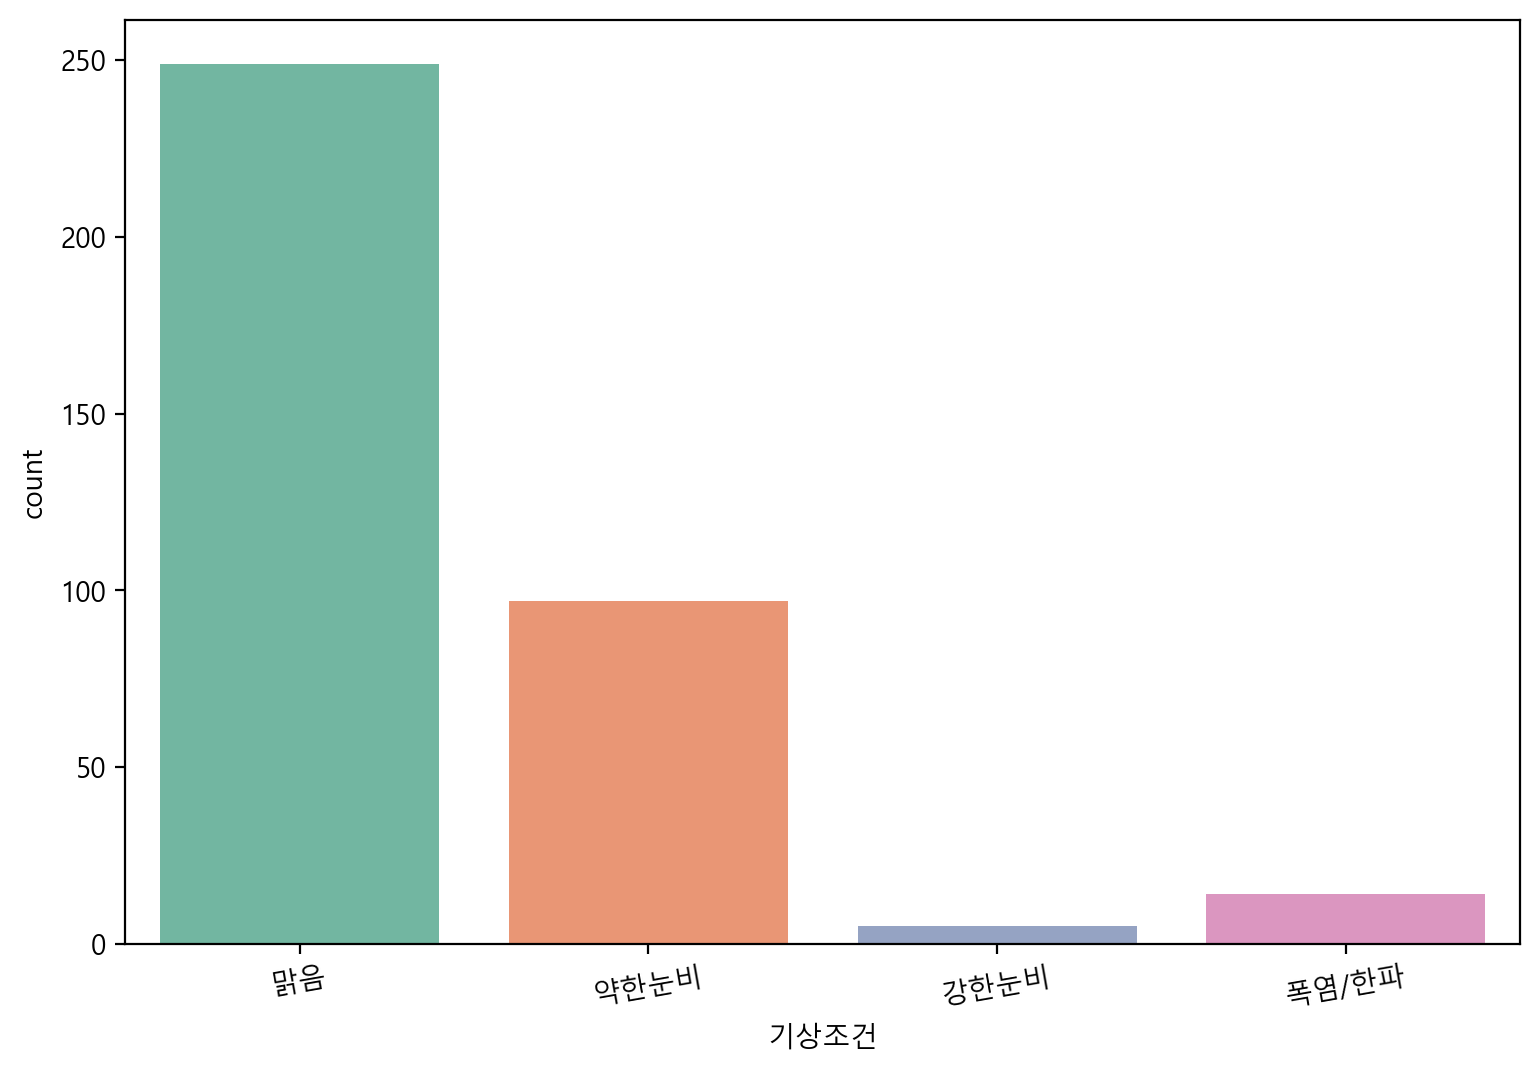

In [26]:
plt.figure(figsize = (9, 6))
plt.xticks(rotation = 10)
sns.countplot(x = '기상조건',
              data = ss_4, 
            palette="Set2")
plt.show()

### 요일별 승차총승객수
- 평일 > 토요일 > 일요일
- 평일 : 월화수목금 점점 증가

In [27]:
ss_4.groupby(['요일'])['승차총승객수'].mean()

요일
금    21721.903846
목    20922.730769
수    20806.788462
월    19130.884615
일    12575.538462
토    16769.509434
화    20397.096154
Name: 승차총승객수, dtype: float64

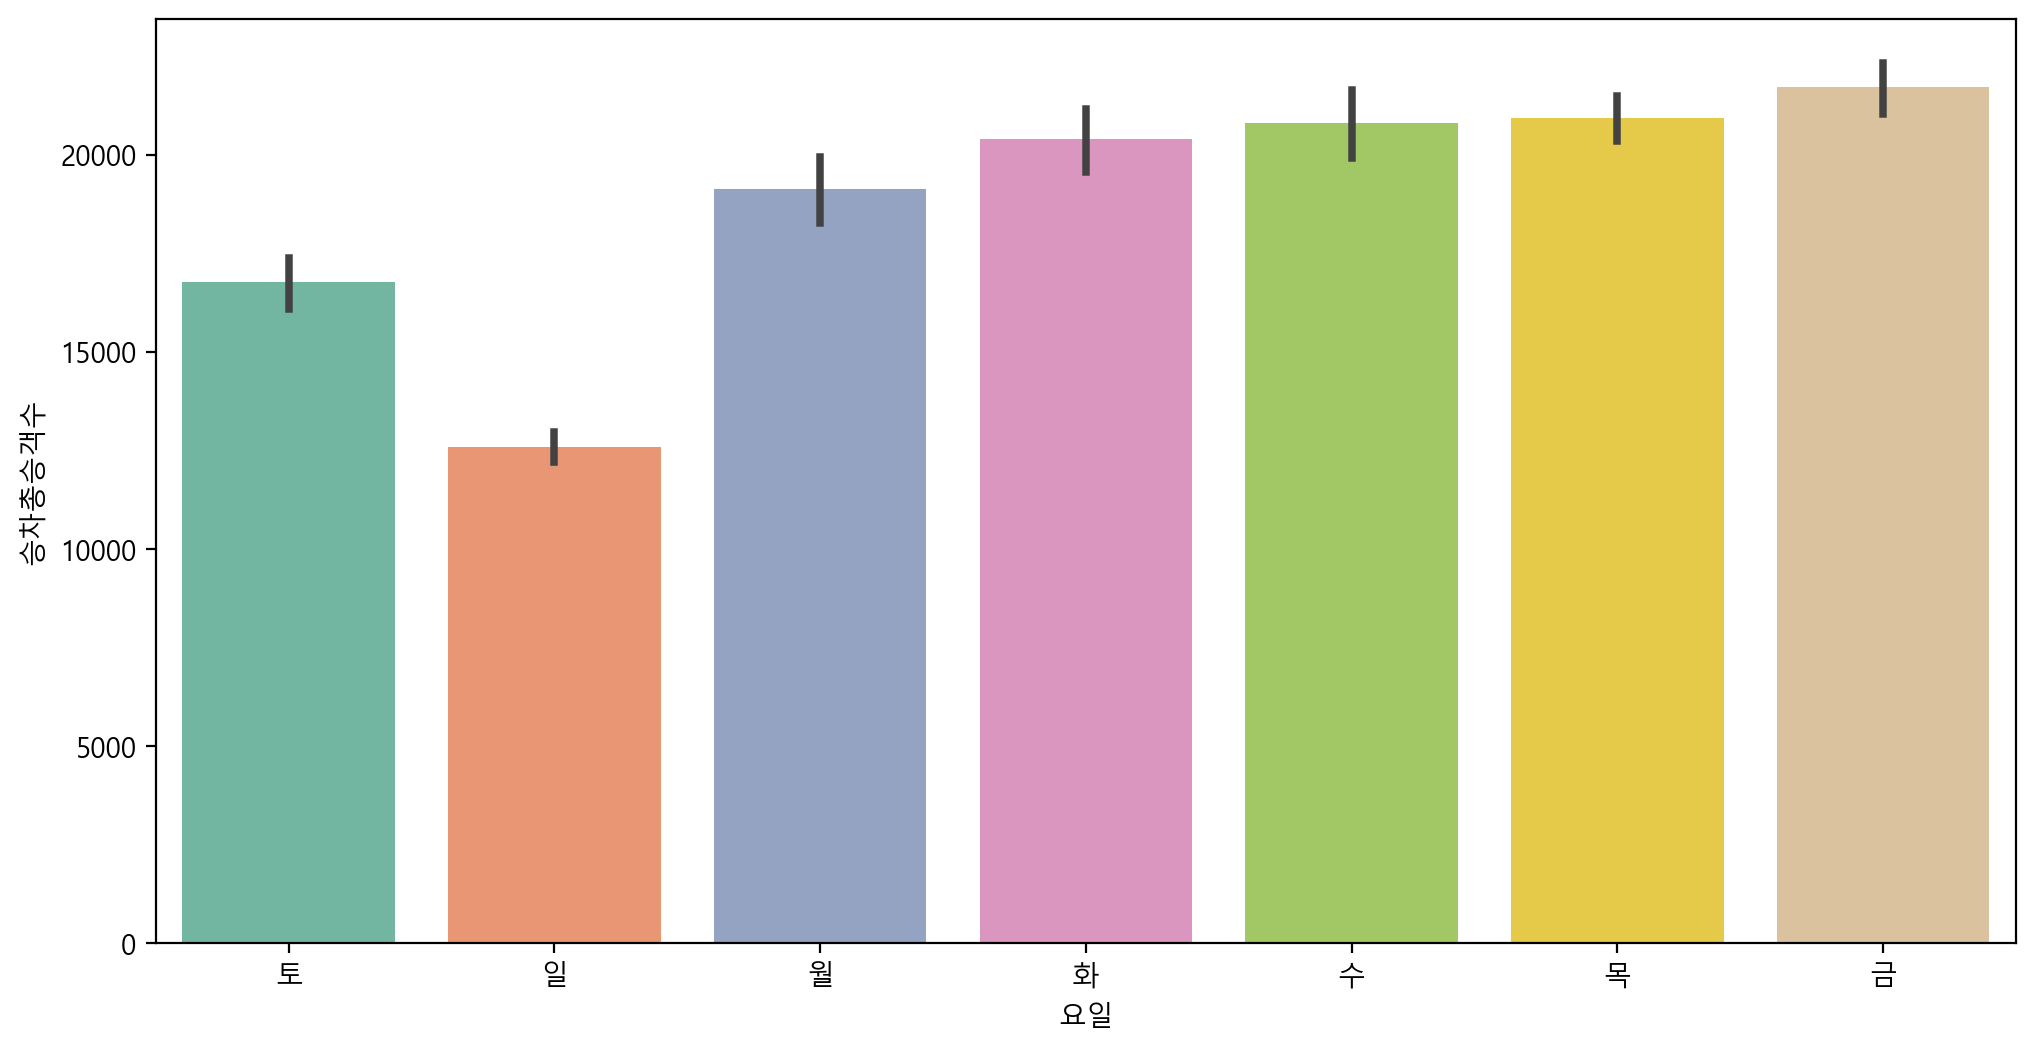

In [28]:
ss_4 = ss_4.astype({'월' : 'int'})
plt.figure(figsize = (12, 6))
sns.barplot(x = '요일',
            y = '승차총승객수',
            data = ss_4, 
            palette="Set2"
           )
plt.show()

In [29]:
data = {
    '요일': ['금', '목', '수', '월', '일', '토', '화'],
    '승차총승객수평균': [21721.903846, 20922.730769, 20806.788462, 19130.884615, 12575.538462, 16769.509434, 20397.096154]
}

df = pd.DataFrame(data)
df
weekend_avg = (16769.509434 + 20397.096154) / 2
weekday_avg = (21721.903846+ 20922.730769+ 20806.788462+ 19130.884615+ 12575.538462) / 5

df_mean = {'when' : ['주중', '주말'], '승차총승객수평균' : [weekday_avg, weekend_avg]}
result = pd.DataFrame(df_mean)
print(result)

  when      승차총승객수평균
0   주중  19031.569231
1   주말  18583.302794


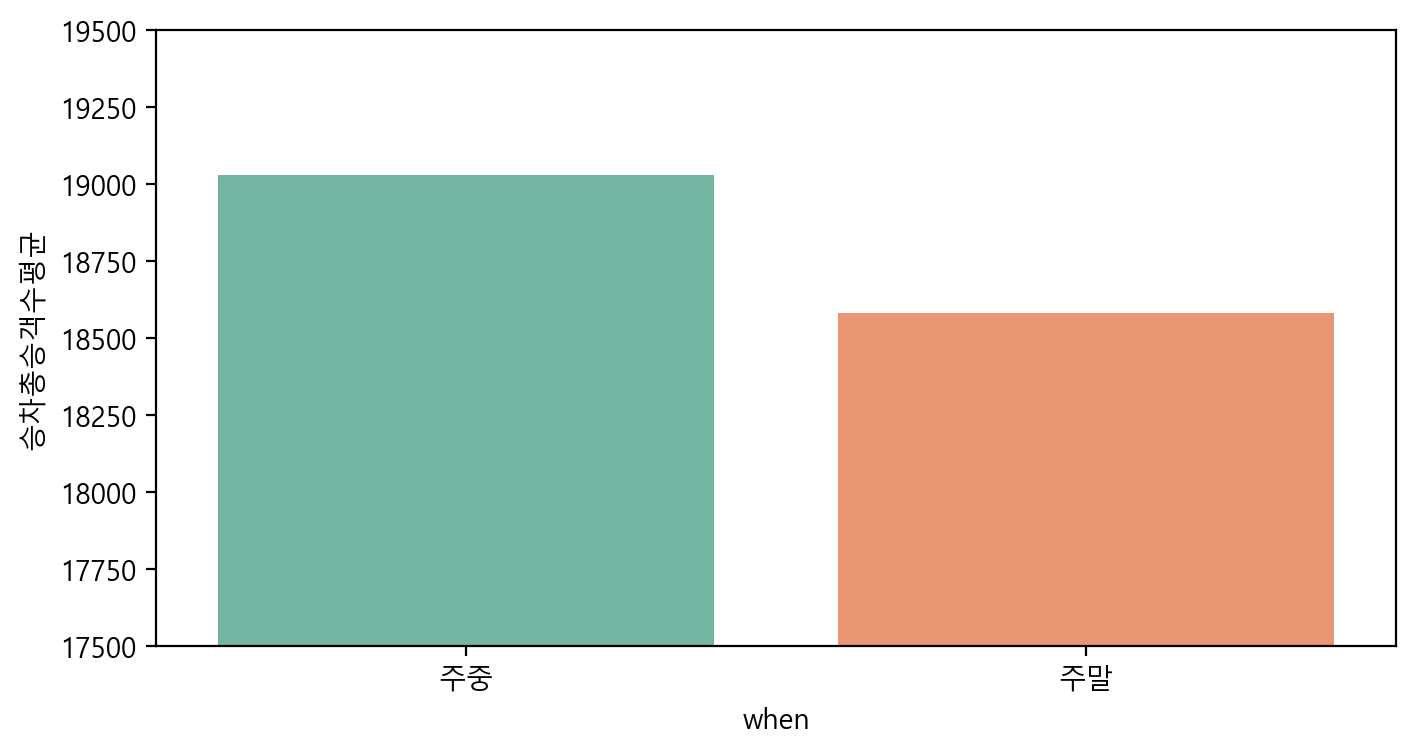

In [30]:
# result = jsil_2.astype({'월' : 'int'})
plt.figure(figsize = (8, 4))
sns.barplot(x = 'when',
            y = '승차총승객수평균',
            data = result, 
            palette="Set2")
plt.ylim([17500, 19500]) # 이렇게 범위 해도 괜찮은걸까.........................
plt.show()

### 공휴일
- 1월1일	20220101
설날	20220131
설날	20220201
설날	20220202
삼일절	20220301
대통령선거일	20220309
어린이날	20220505
부처님오신날	20220508
전국동시지방선거	20220601
현충일	20220606
광복절	20220815
추석	20220909
추석	20220910
추석	20220911
대체공휴일	20220912
개천절	20221003
한글날	20221009
대체공휴일	20221010
기독탄신일	20221225
기독탄신일	20231225

In [31]:
line_4.head(2)

,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0
1,412,2022-01-02,2022,1,2,일,4호선,성신여대입구(돈암),10387.0,10602.0


### 공휴일 - 1월
- 1월달 승객수 비교 

In [32]:
line_4_jan = line_4[line_4['월'] == 1].reset_index()
line_4_jan.head(1)

,level_0,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0


## - 1월 날짜별 승차총승객수
  - 1월1일 20220101 설날 20220131
  - 승객수가 상대적으로 적다.
  - 2, 9, 16, 23, 30일은 일요일. 

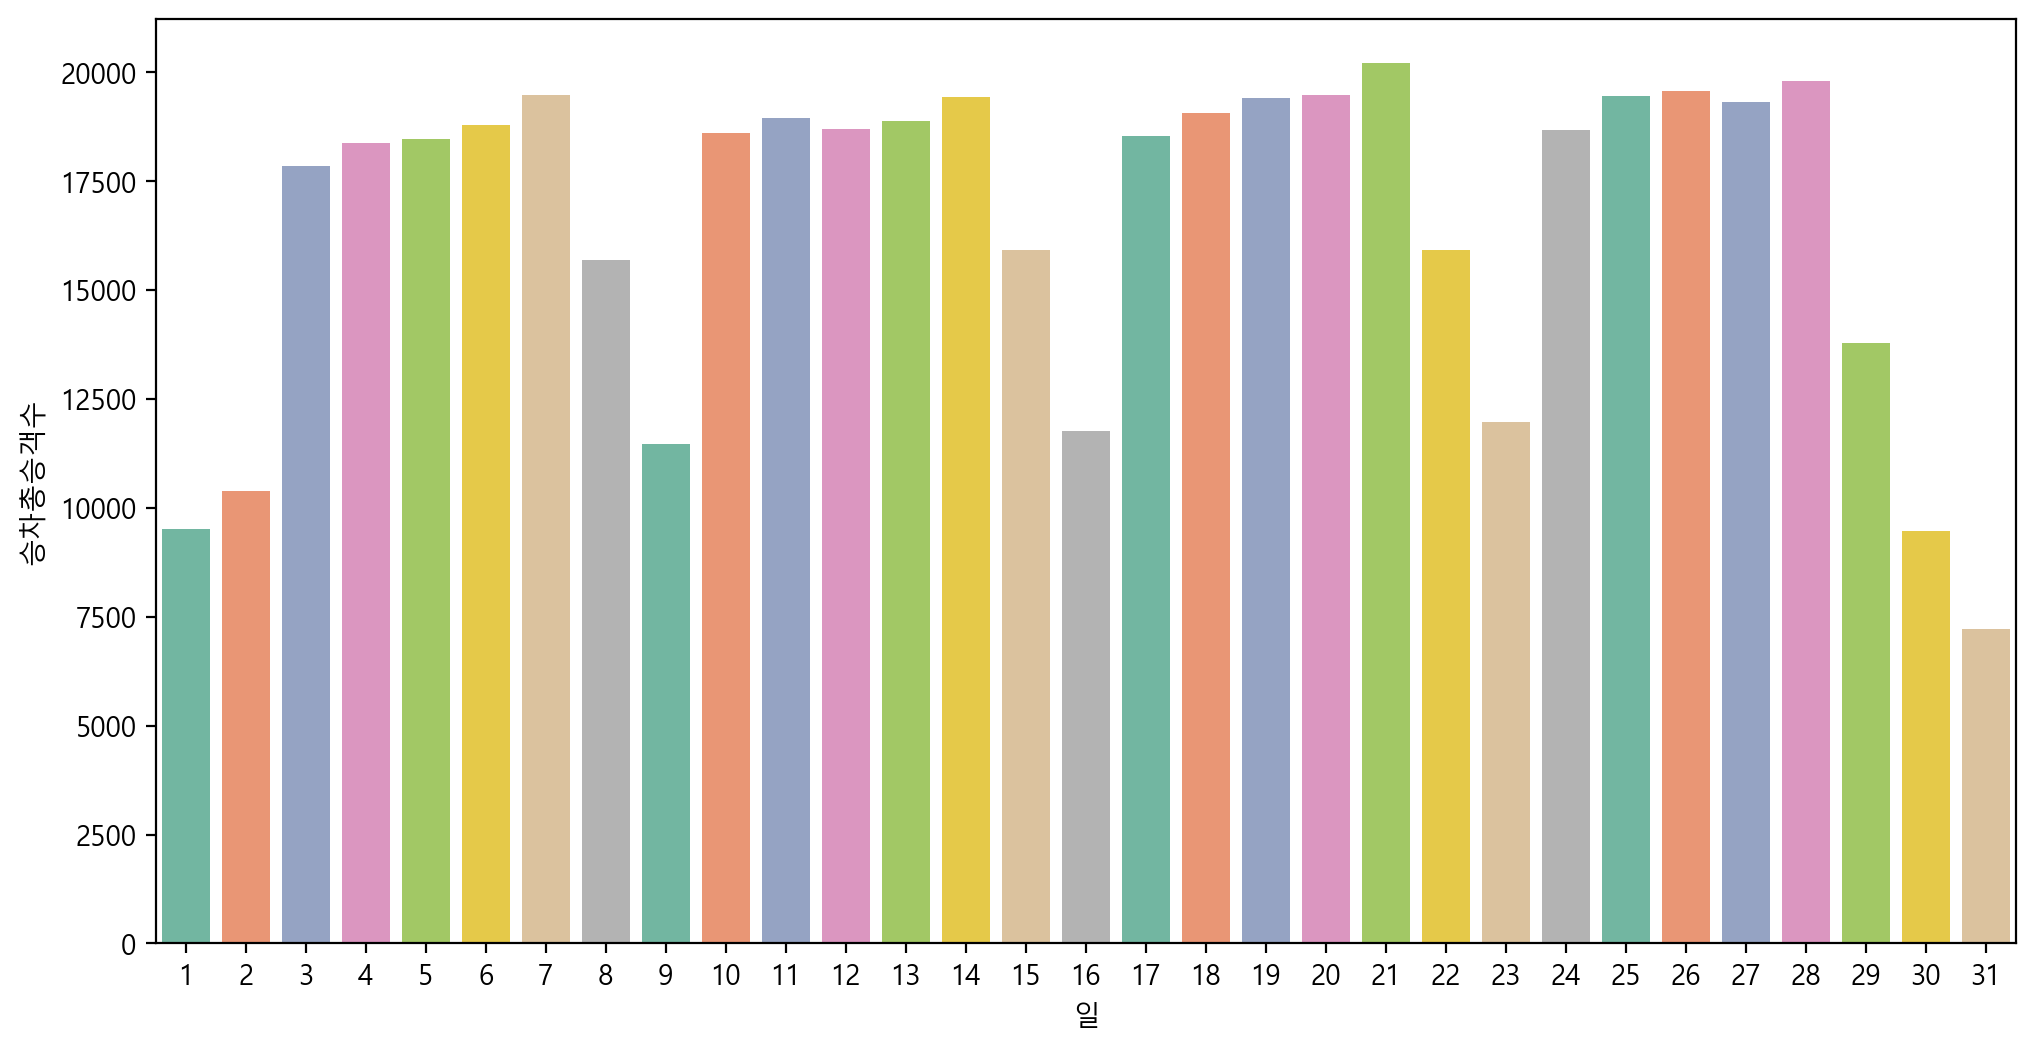

In [33]:
plt.figure(figsize = (12, 6))
sns.barplot(x = '일',
            y = '승차총승객수',
            data = line_4_jan, 
            palette="Set2"
           )
plt.show()

- 1월 중 요일별 승차총승객수 

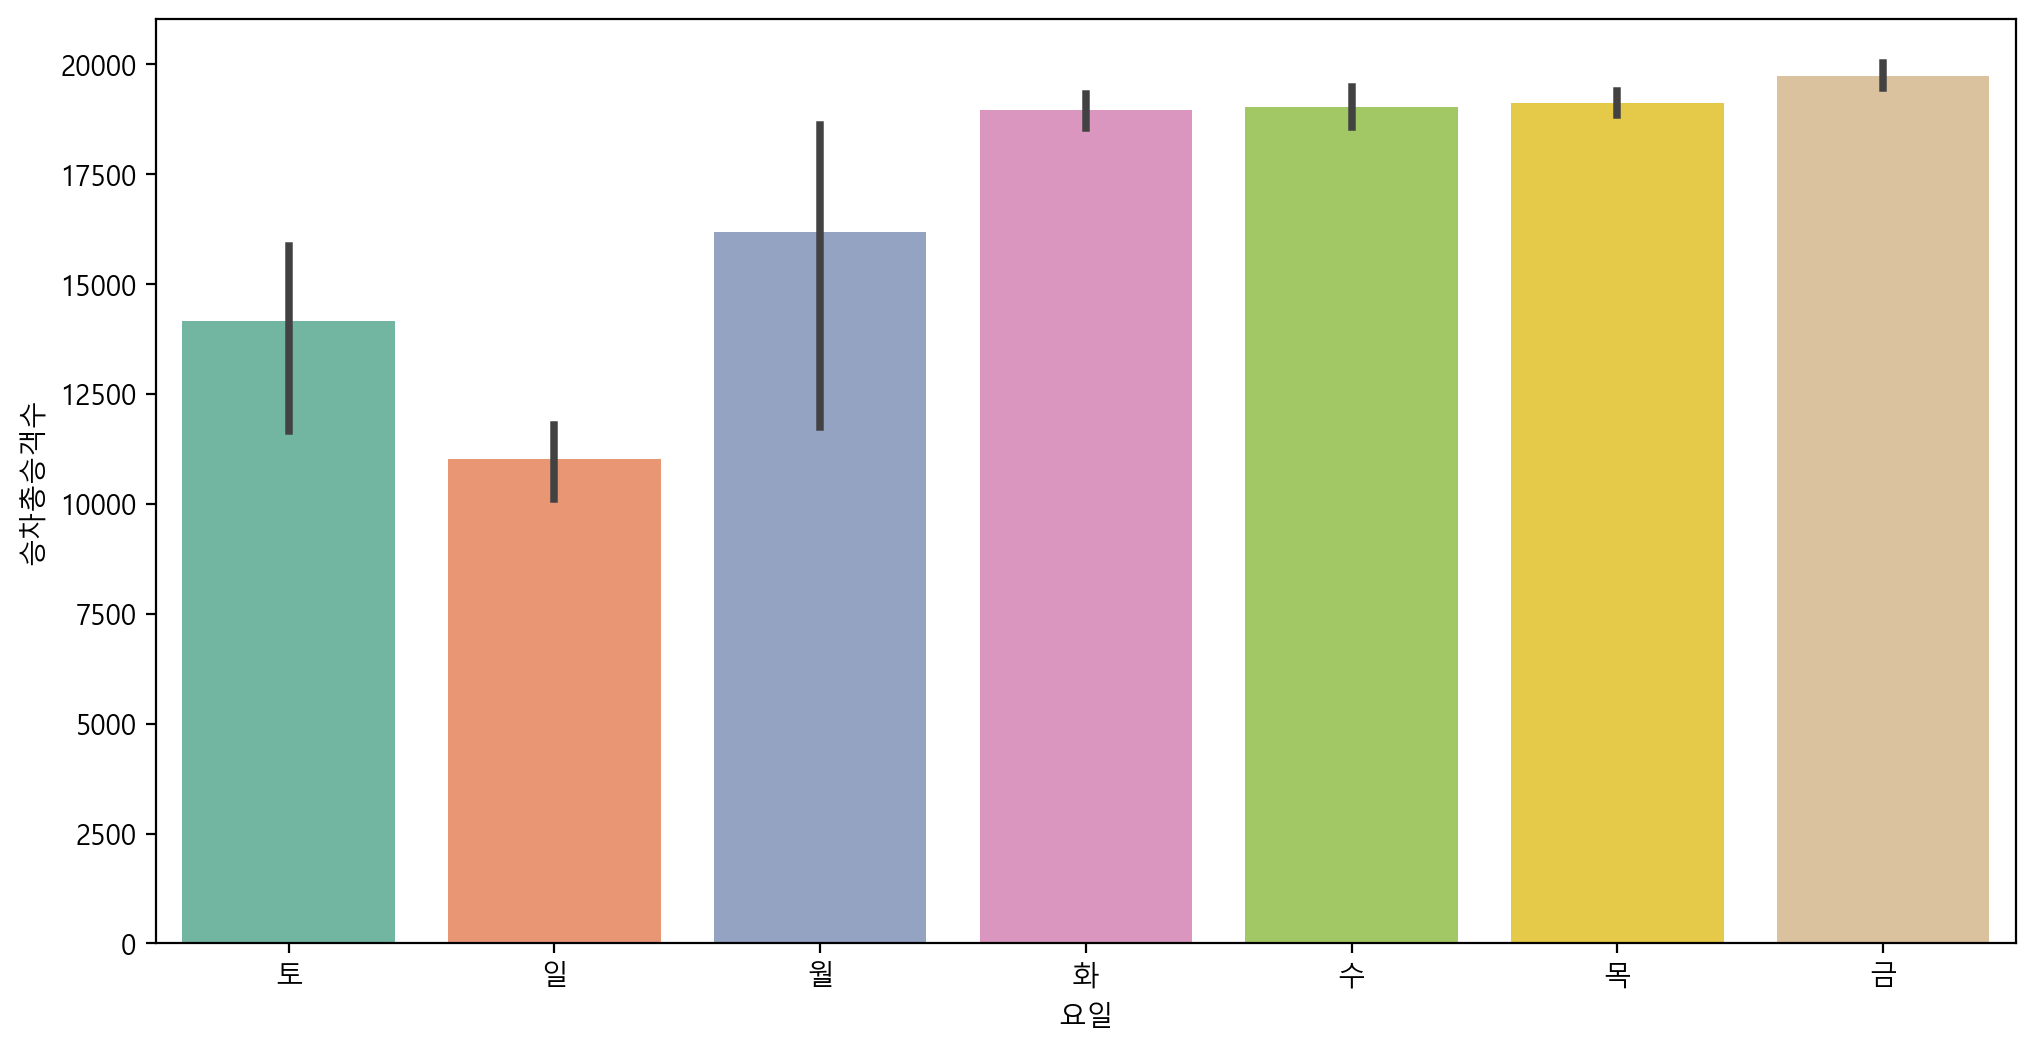

In [34]:
plt.figure(figsize = (12, 6))
sns.barplot(x = '요일',
            y = '승차총승객수',
            data = line_4_jan, 
            palette="Set2"
           )
plt.show()

- 1월 기상조건별 승차총승객수
  - 700명 정도 차이남(거의 비슷하다고 생각)

In [35]:
line_4_jan = pd.concat([line_4_jan, wet_22_con], axis=1)
line_4_jan.drop(columns='index', axis=1)
line_4_jan.dropna(inplace=True)
line_4_jan.head(1)

,level_0,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건
0,0.0,97.0,2022-01-01,2022.0,1.0,1.0,토,4호선,성신여대입구(돈암),9522.0,9234.0,맑음


In [36]:
line_4_jan.groupby(['기상조건'])['승차총승객수'].mean()

기상조건
맑음      16730.208333
약한눈비    16073.000000
Name: 승차총승객수, dtype: float64

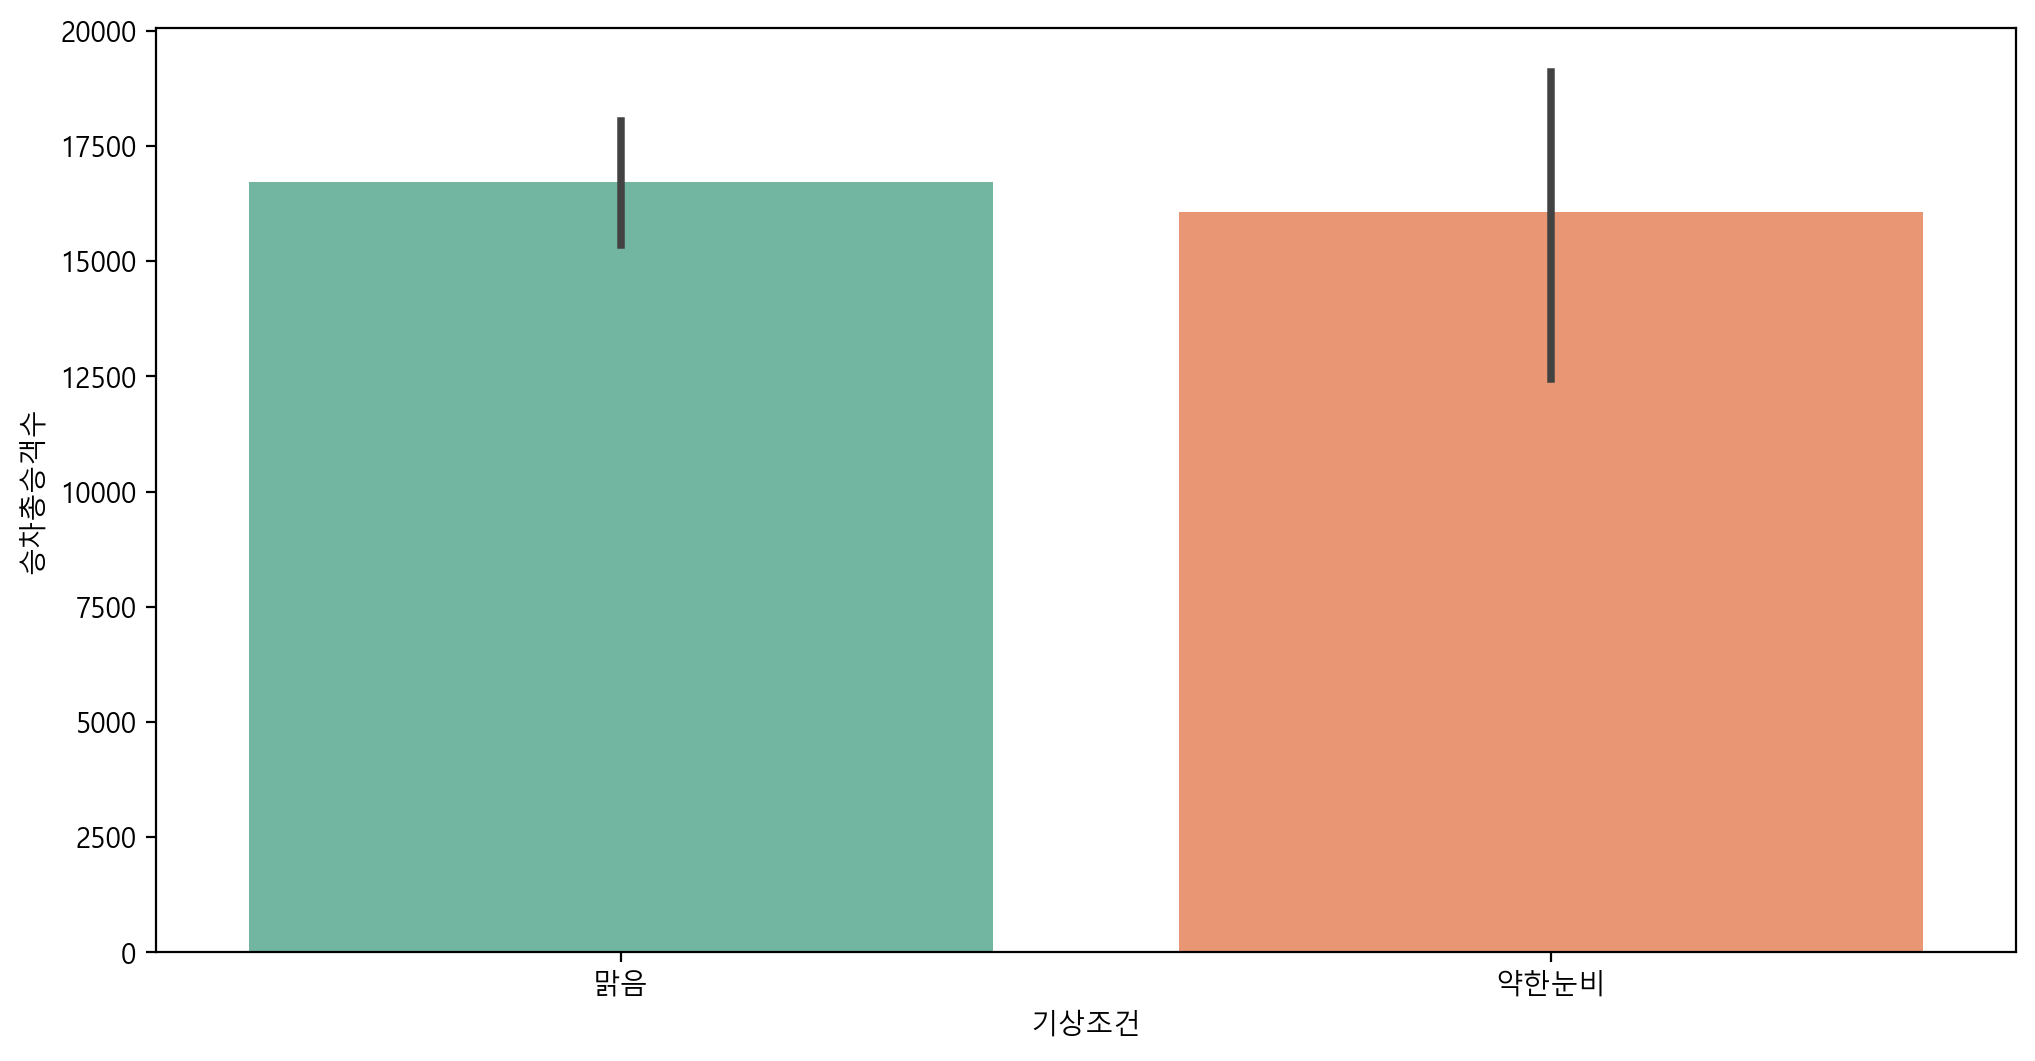

In [37]:
plt.figure(figsize = (12, 6))
sns.barplot(x = '기상조건',
            y = '승차총승객수',
            data = line_4_jan, 
            palette="Set2"
           )
plt.show()

## 일요일, 공휴일을 모두 공휴일로 value값바꾸기

In [51]:
ss_4.head(2)

,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건
0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0,맑음
1,412,2022-01-02,2022,1,2,일,4호선,성신여대입구(돈암),10387.0,10602.0,약한눈비


In [52]:
#holi = {'요일' : {'일' : '일'}}
df_2022 = ss_4.replace(holi)
df_2022.head(10)

,index,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건
0,97,2022-01-01,2022,1,1,토,4호선,성신여대입구(돈암),9522.0,9234.0,맑음
1,412,2022-01-02,2022,1,2,일,4호선,성신여대입구(돈암),10387.0,10602.0,약한눈비
2,725,2022-01-03,2022,1,3,월,4호선,성신여대입구(돈암),17836.0,17395.0,맑음
3,1042,2022-01-04,2022,1,4,화,4호선,성신여대입구(돈암),18370.0,17764.0,맑음
4,1360,2022-01-05,2022,1,5,수,4호선,성신여대입구(돈암),18464.0,17978.0,맑음
5,1674,2022-01-06,2022,1,6,목,4호선,성신여대입구(돈암),18785.0,18085.0,맑음
6,1988,2022-01-07,2022,1,7,금,4호선,성신여대입구(돈암),19469.0,18995.0,맑음
7,2301,2022-01-08,2022,1,8,토,4호선,성신여대입구(돈암),15681.0,14791.0,맑음
8,2614,2022-01-09,2022,1,9,일,4호선,성신여대입구(돈암),11473.0,11120.0,맑음
9,2928,2022-01-10,2022,1,10,월,4호선,성신여대입구(돈암),18591.0,18222.0,약한눈비


In [53]:
df_2022['사용일자'] = pd.to_datetime(df_2022['사용일자'], format='%Y-%m-%d')

# "20220101"과 "20220131"에 해당하는 행의 "요일" 열 값을 수정
df_2022.loc[df_2022['사용일자'] == '2022-01-01', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-01-31', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-02-01', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-02-02', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-03-01', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-03-09', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-05-05', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-05-08', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-06-01', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-06-06', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-08-15', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-09-09', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-09-10', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-09-11', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-09-12', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-10-03', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-10-09', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-10-10', '요일'] = '일'
df_2022.loc[df_2022['사용일자'] == '2022-12-25', '요일'] = '일'
# df_2022.tail(10)

### 요일 별 총 승객수

In [54]:
df_2022.groupby(['요일'])['승차총승객수'].mean()

요일
금    21919.843137
목    21006.627451
수    21321.632653
월    20076.826087
일    12338.985075
토    17077.176471
화    20848.980000
Name: 승차총승객수, dtype: float64

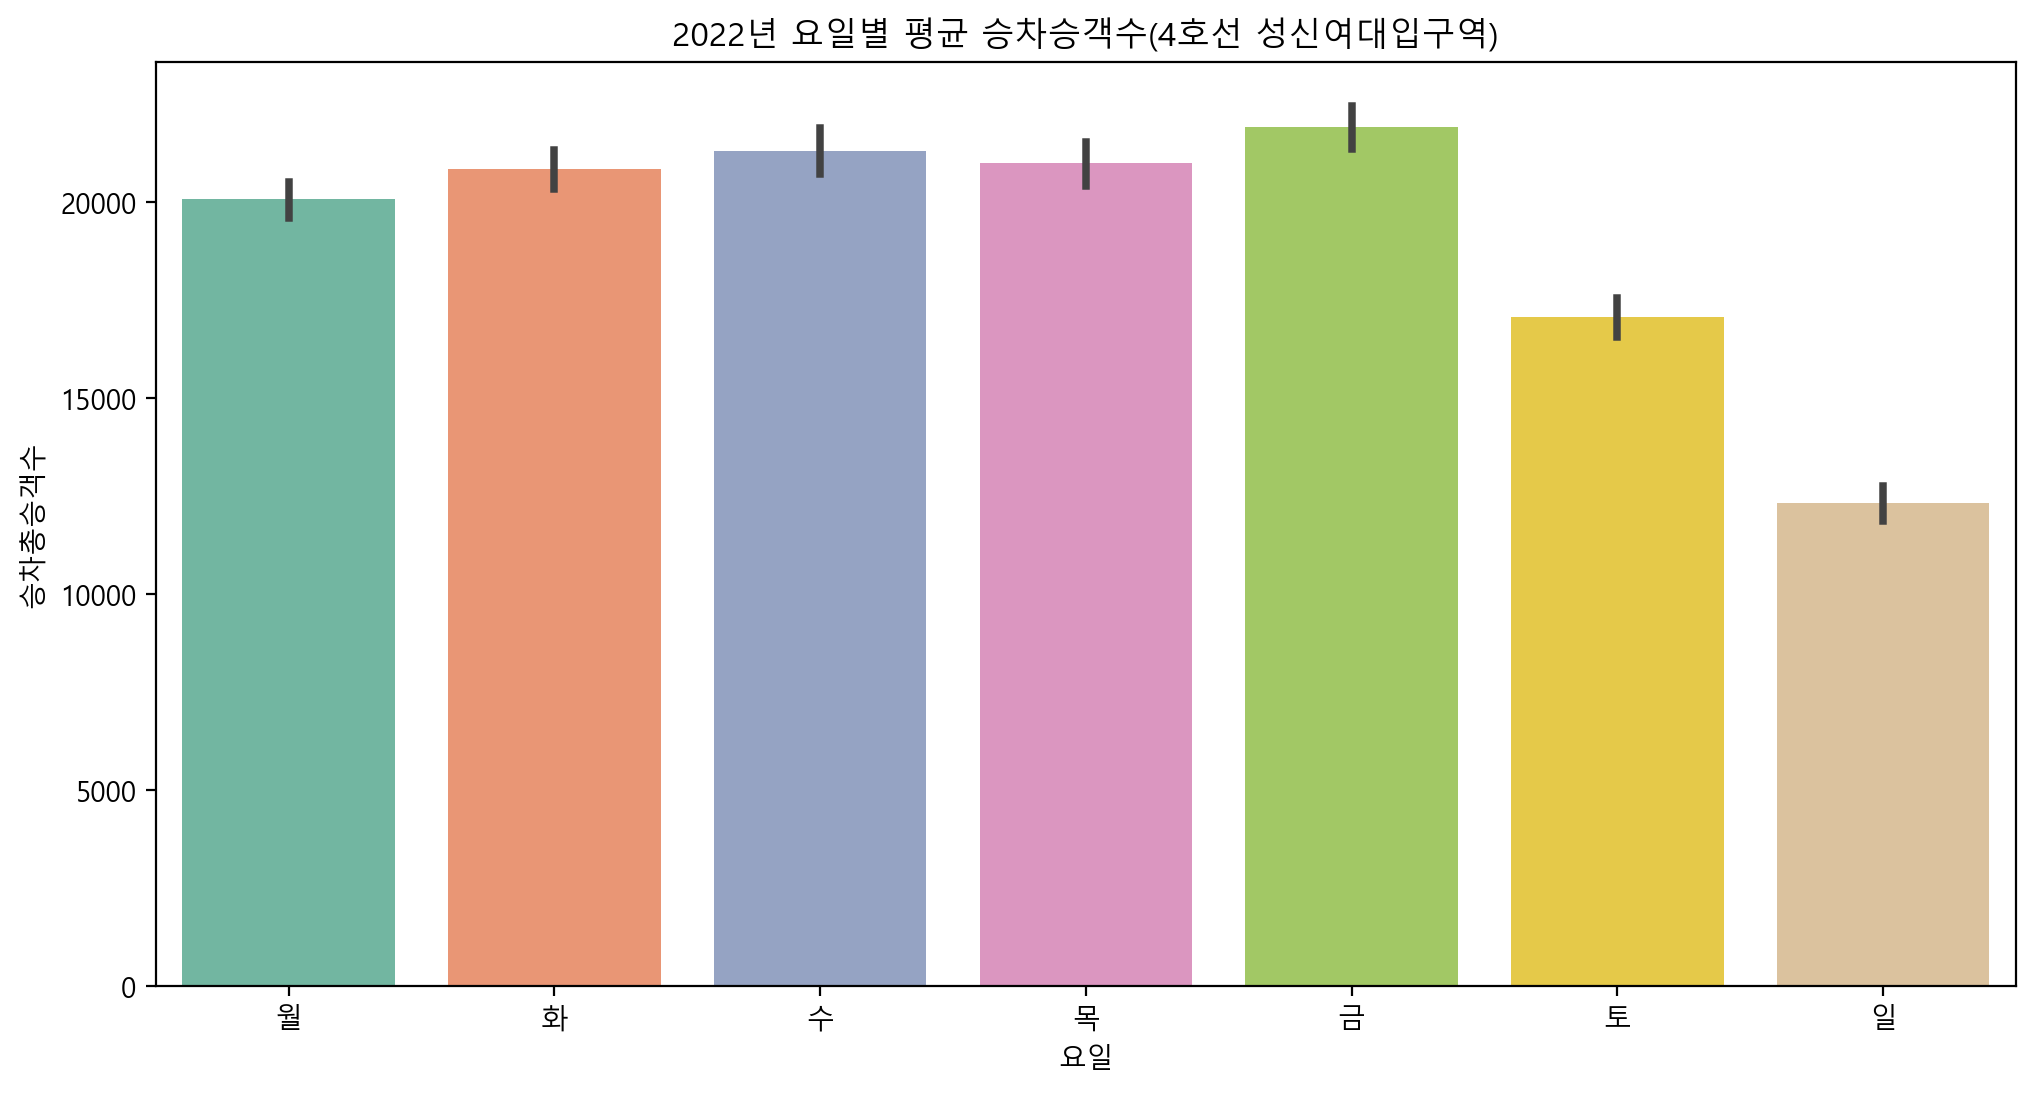

In [66]:
weekday_order = ['월', '화', '수', '목', '금', '토', '일'] 
plt.figure(figsize = (12, 6))
sns.barplot(x = '요일',
            y = '승차총승객수',
            data = df_2022, 
            palette="Set2",
            order=weekday_order
           )
plt.title('2022년 요일별 평균 승차승객수(4호선 성신여대입구역)')
plt.show()

### 평일과 토+공휴일 총승객수 평균 비교

In [58]:
data = {
    '요일': ['일', '금', '목', '수', '월', '토', '화'],
    '승차총승객수평균': [12338.985075, 21919.843137, 21006.627451, 21321.632653, 20076.826087, 17077.176471, 20848.980000]
}
df = pd.DataFrame(data)
df
weekend_avg = (12338.985075 + 17077.176471) / 2
weekday_avg = (21919.843137+ 21006.627451+ 21321.632653+ 20076.826087+ 20848.980000) / 5

df_mean = {'when' : ['주중', '주말'], '승차총승객수평균' : [weekday_avg, weekend_avg]}
result = pd.DataFrame(df_mean)
print(result)

  when      승차총승객수평균
0   주중  21034.781866
1   주말  14708.080773


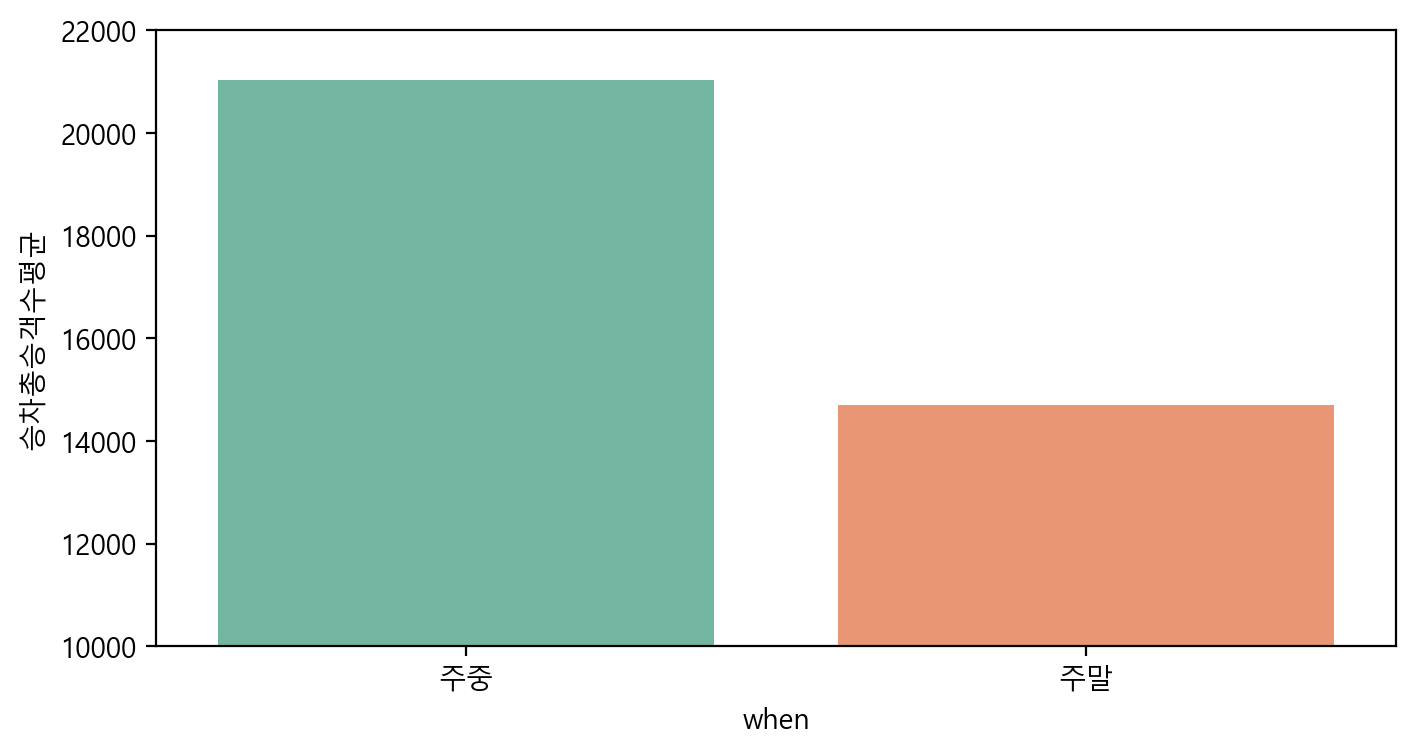

In [59]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'when',
            y = '승차총승객수평균',
            data = result, 
            palette="Set2")
plt.ylim([10000, 22000]) # 이렇게 범위 해도 괜찮은걸까.........................
plt.show()

## 4호선 전체 요일별 비교

In [60]:
sub_22.head(1)

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,2022-01-01,2022,1,1,토,1호선,서울역,18398.0,16926.0


In [71]:
sub_22['사용일자'] = pd.to_datetime(l_4['사용일자'], format='%Y-%m-%d')

# "20220101"과 "20220131"에 해당하는 행의 "요일" 열 값을 수정
sub_22.loc[sub_22['사용일자'] == '2022-01-01', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-01-31', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-02-01', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-02-02', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-03-01', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-03-09', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-05-05', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-05-08', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-06-01', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-06-06', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-08-15', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-09-09', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-09-10', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-09-11', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-09-12', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-10-03', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-10-09', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-10-10', '요일'] = '일'
sub_22.loc[sub_22['사용일자'] == '2022-12-25', '요일'] = '일'

In [72]:
l_4 = sub_22[sub_22['호선명'] == '4호선']
l_4.head(1)

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
93,2022-01-01,2022,1,1,일,4호선,수유(강북구청),15534.0,15487.0


In [73]:
l_4.head(1)

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
93,2022-01-01,2022,1,1,일,4호선,수유(강북구청),15534.0,15487.0


In [74]:
l_4.groupby(['요일'])['승차총승객수'].mean()

요일
금    19470.469080
목    18922.521116
수    19081.935636
월    18073.234950
일    10075.324340
토    14482.700603
화    18799.433846
Name: 승차총승객수, dtype: float64

In [76]:
sub_22.groupby(['요일'])['승차총승객수'].mean()

요일
금    15768.906485
목    15389.161776
수    15147.296411
월    14065.151570
일     7858.581998
토    10873.849618
화    15062.061322
Name: 승차총승객수, dtype: float64

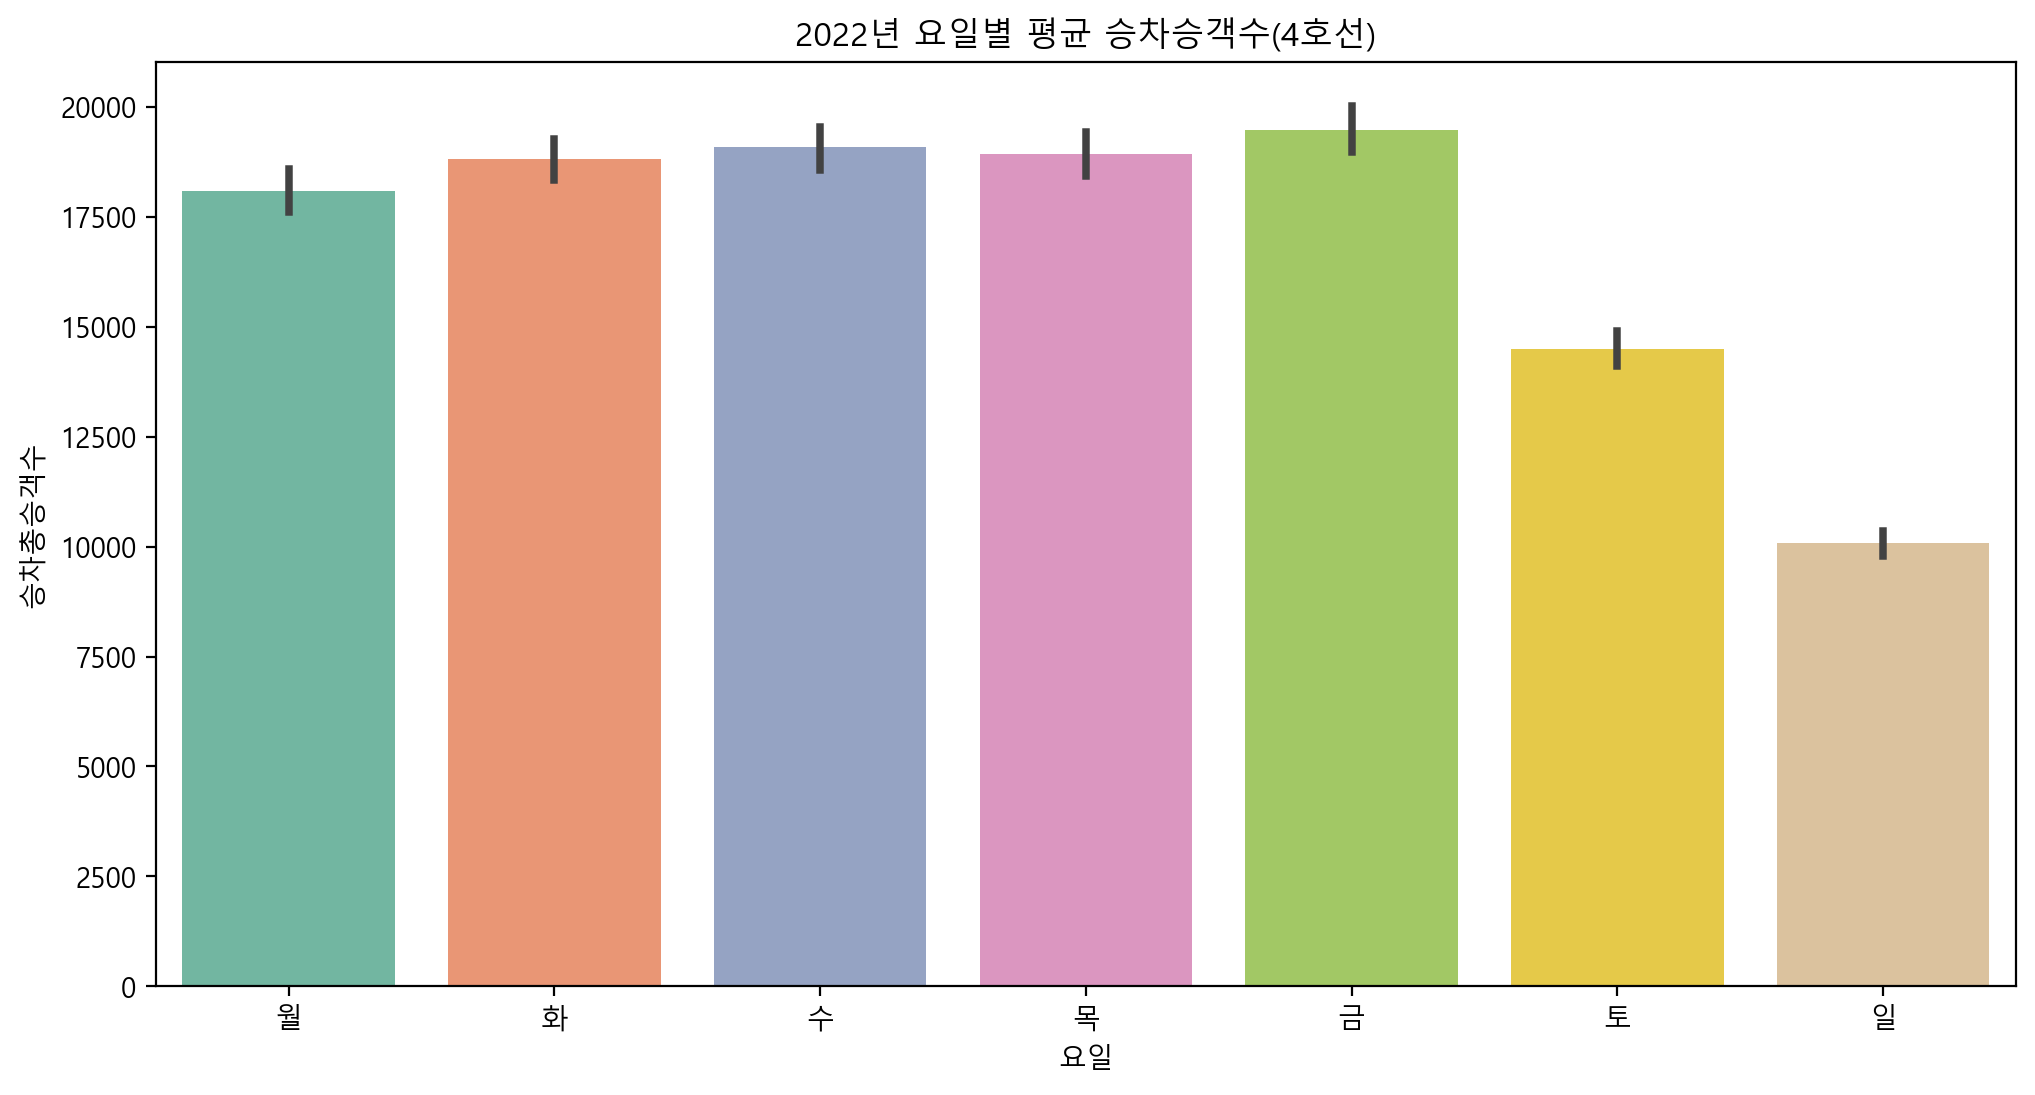

In [75]:
weekday_order = ['월', '화', '수', '목', '금', '토', '일'] 
plt.figure(figsize = (12, 6))
sns.barplot(x = '요일',
            y = '승차총승객수',
            data = l_4, 
            palette="Set2",
            order=weekday_order
           )
plt.title('2022년 요일별 평균 승차승객수(4호선)')
plt.show()

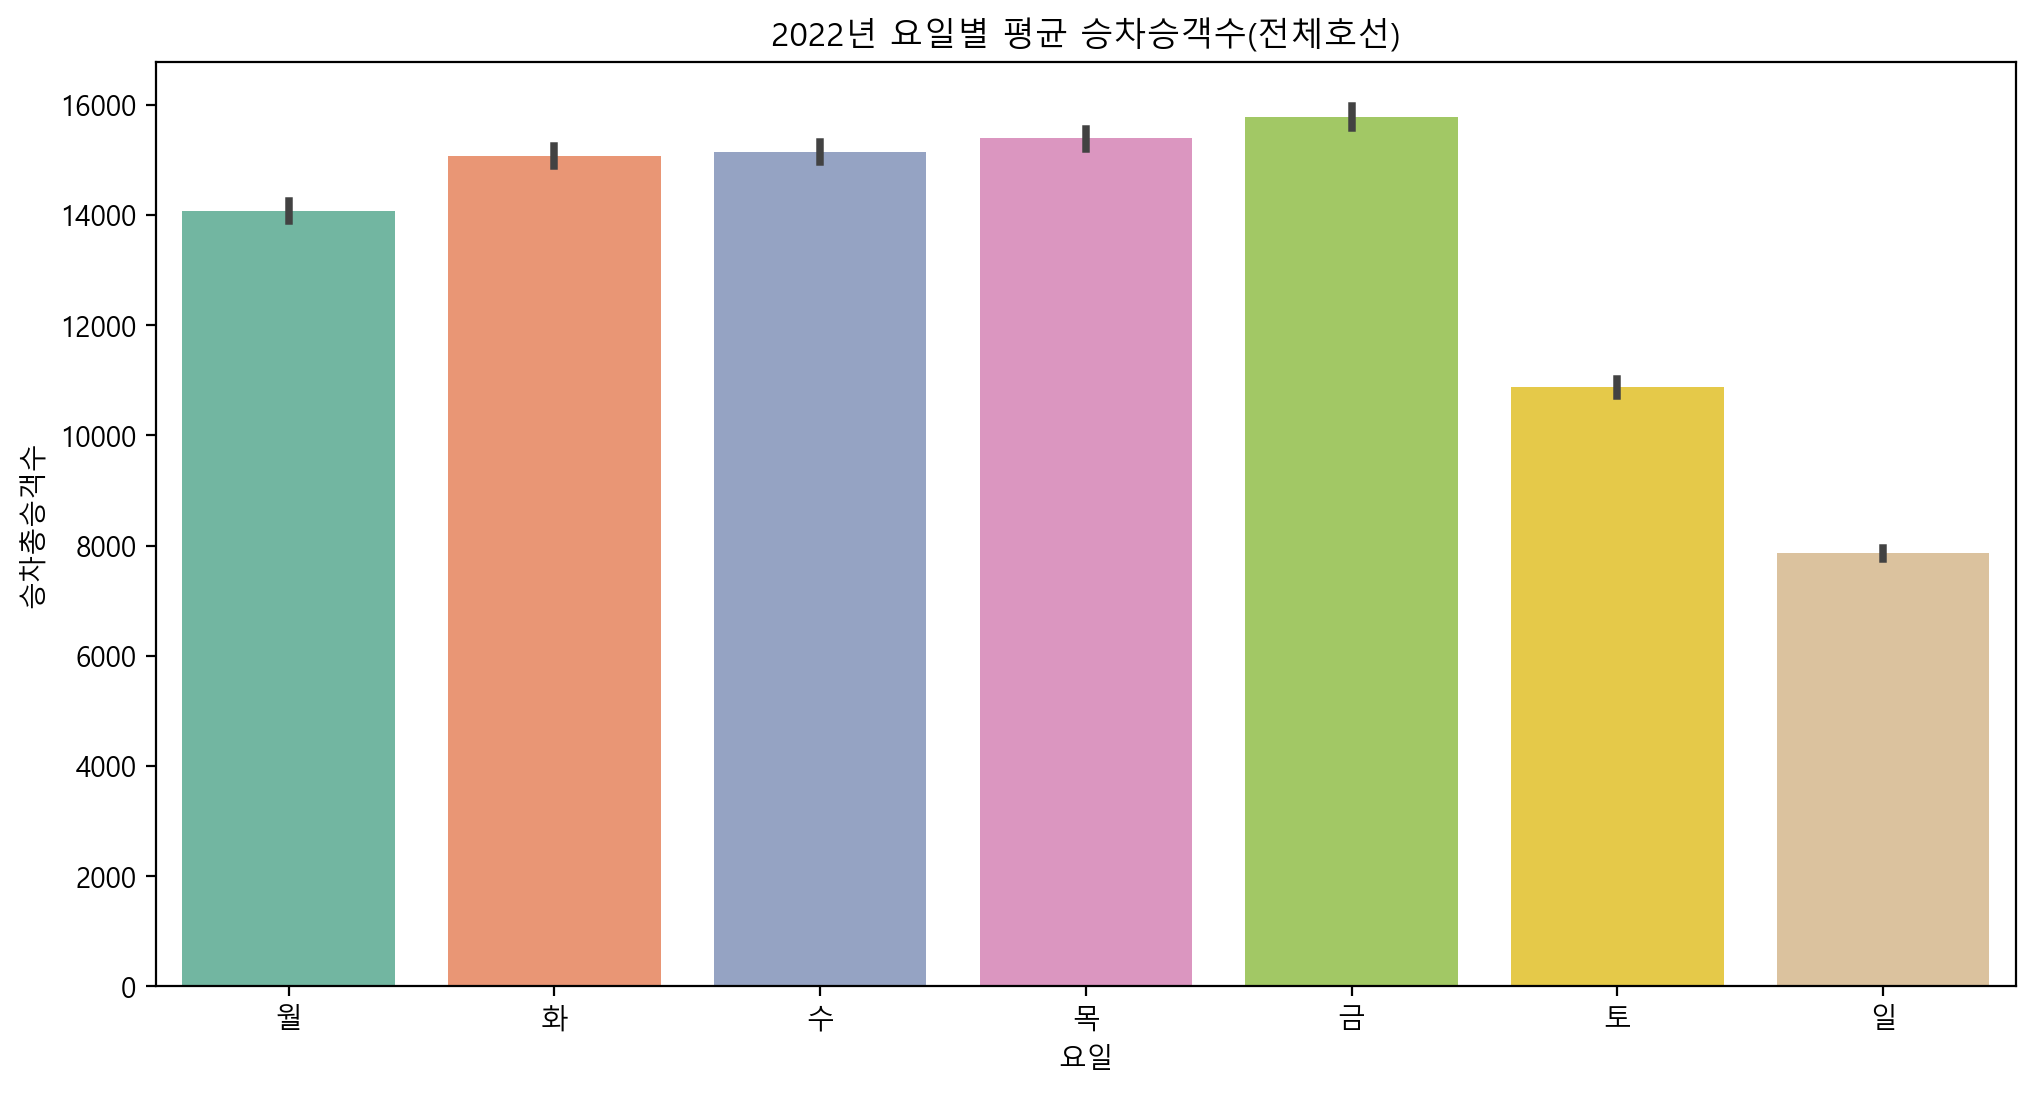

In [77]:
weekday_order = ['월', '화', '수', '목', '금', '토', '일'] 
plt.figure(figsize = (12, 6))
sns.barplot(x = '요일',
            y = '승차총승객수',
            data = sub_22, 
            palette="Set2",
            order=weekday_order
           )
plt.title('2022년 요일별 평균 승차승객수(전체호선)')
plt.show()